In [ ]:
import datetime as dt
from pathlib import Path
import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt
plt.close('all')
import yfinance as yf
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [ ]:
xrp = yf.download(tickers='XRP-USD', start='2019-09-01', end = '2021-08-11', interval='1d')
xrp.drop(columns = ['Open','High','Low','Adj Close','Volume'], inplace = True)
# sq_1d.reset_index(inplace=True)
# sq_1d.rename(columns = {'index':'Datetime'}, inplace = True)
# sq_1d.set_index(pd.to_datetime(sq_1d['Datetime'],infer_datetime_format=True),inplace=True)
xrp.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-09-01,0.258054
2019-09-02,0.260820
2019-09-03,0.263139
2019-09-04,0.259905
2019-09-05,0.256346


In [ ]:
# Drop NAs and calculate daily percent return
xrp['daily_return'] = xrp['Close'].dropna().pct_change()
xrp.head()

,Close,daily_return
Date,,
2019-09-01,0.258054,NaN
2019-09-02,0.260820,0.010719
2019-09-03,0.263139,0.008891
2019-09-04,0.259905,-0.012290
2019-09-05,0.256346,-0.013694


In [ ]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
xrp['fast_close'] = xrp['Close'].ewm(halflife=short_window).mean()
xrp['slow_close'] = xrp['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
xrp['crossover_long'] = np.where(xrp['fast_close'] > xrp['slow_close'], 1.0, 0.0)
xrp['crossover_short'] = np.where(xrp['fast_close'] < xrp['slow_close'], -1.0, 0.0)
xrp['crossover_signal'] = xrp['crossover_long'] + xrp['crossover_short']

xrp.head()

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,
2019-09-01,0.258054,NaN,0.258054,0.258054,0.0,0.0,0.0
2019-09-02,0.260820,0.010719,0.259898,0.259485,1.0,0.0,1.0
2019-09-03,0.263139,0.008891,0.261750,0.260788,1.0,0.0,1.0
2019-09-04,0.259905,-0.012290,0.260766,0.260544,1.0,0.0,1.0
2019-09-05,0.256346,-0.013694,0.258485,0.259584,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

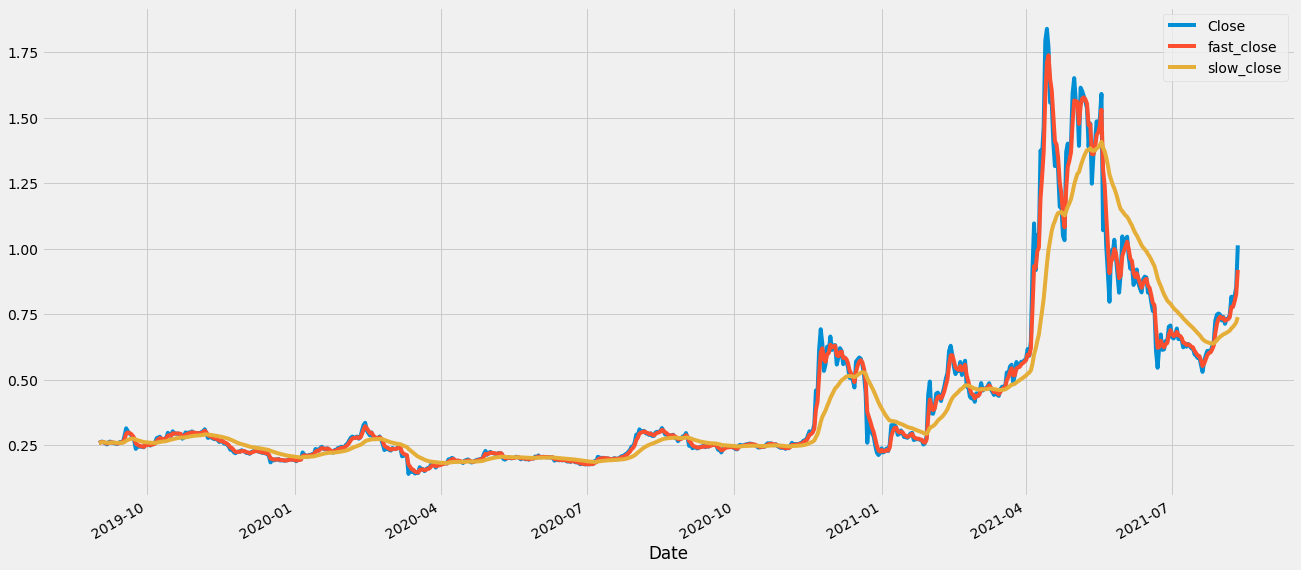

In [ ]:
# Plot the EMA of XRP/USD closing prices
xrp[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [ ]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
xrp['fast_vol'] = xrp['daily_return'].ewm(halflife=short_vol_window).std()
xrp['slow_vol'] = xrp['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
xrp['vol_trend_long'] = np.where(xrp['fast_vol'] < xrp['slow_vol'], 1.0, 0.0)
xrp['vol_trend_short'] = np.where(xrp['fast_vol'] > xrp['slow_vol'], -1.0, 0.0) 
xrp['vol_trend_signal'] = xrp['vol_trend_long'] + xrp['vol_trend_short']

xrp

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,
2019-09-01,0.258054,NaN,0.258054,0.258054,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2019-09-02,0.260820,0.010719,0.259898,0.259485,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2019-09-03,0.263139,0.008891,0.261750,0.260788,1.0,0.0,1.0,0.001292,0.001292,0.0,0.0,0.0
2019-09-04,0.259905,-0.012290,0.260766,0.260544,1.0,0.0,1.0,0.014285,0.012986,0.0,-1.0,-1.0
2019-09-05,0.256346,-0.013694,0.258485,0.259584,0.0,-1.0,-1.0,0.011559,0.013172,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,0.816281,0.093459,0.777345,0.695521,1.0,0.0,1.0,0.052160,0.046380,0.0,-1.0,-1.0
2021-08-08,0.778739,-0.045992,0.778042,0.701093,1.0,0.0,1.0,0.070607,0.047261,0.0,-1.0,-1.0
2021-08-09,0.818553,0.051126,0.798297,0.708959,1.0,0.0,1.0,0.057924,0.046880,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

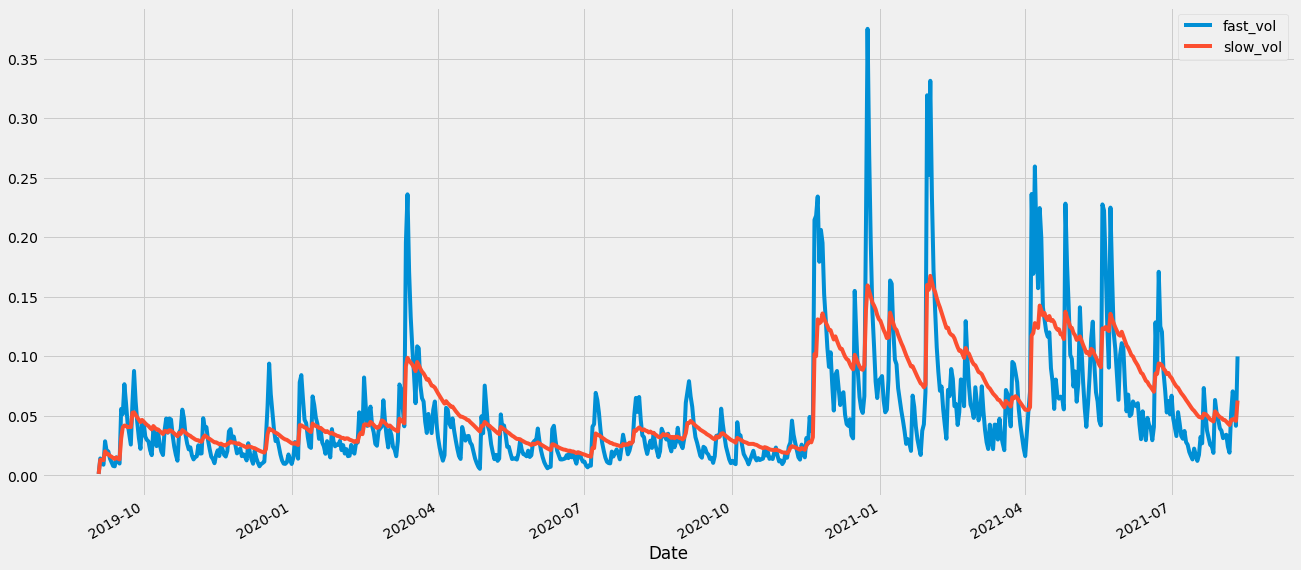

In [ ]:
# Plot the EMA of SQ return volatility
xrp[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [ ]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
xrp['bollinger_mid_band'] = xrp['Close'].rolling(window=bollinger_window).mean()
xrp['bollinger_std'] = xrp['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
xrp['bollinger_upper_band']  = xrp['bollinger_mid_band'] + (xrp['bollinger_std'] * 1)
xrp['bollinger_lower_band']  = xrp['bollinger_mid_band'] - (xrp['bollinger_std'] * 1)

# Calculate bollinger band trading signal
xrp['bollinger_long'] = np.where(xrp['Close'] < xrp['bollinger_lower_band'], 1.0, 0.0)
xrp['bollinger_short'] = np.where(xrp['Close'] > xrp['bollinger_upper_band'], -1.0, 0.0)
xrp['bollinger_signal'] = xrp['bollinger_long'] + xrp['bollinger_short']

xrp

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2019-09-01,0.258054,NaN,0.258054,0.258054,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-02,0.260820,0.010719,0.259898,0.259485,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-03,0.263139,0.008891,0.261750,0.260788,1.0,0.0,1.0,0.001292,0.001292,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-04,0.259905,-0.012290,0.260766,0.260544,1.0,0.0,1.0,0.014285,0.012986,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-05,0.256346,-0.013694,0.258485,0.259584,0.0,-1.0,-1.0,0.011559,0.013172,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,0.816281,0.093459,0.777345,0.695521,1.0,0.0,1.0,0.052160,0.046380,0.0,-1.0,-1.0,0.676120,0.082178,0.758298,0.593942,0.0,-1.0,-1.0
2021-08-08,0.778739,-0.045992,0.778042,0.701093,1.0,0.0,1.0,0.070607,0.047261,0.0,-1.0,-1.0,0.687179,0.080243,0.767422,0.606936,0.0,-1.0,-1.0
2021-08-09,0.818553,0.051126,0.798297,0.708959,1.0,0.0,1.0,0.057924,0.046880,0.0,-1.0,-1.0,0.701640,0.076262,0.777902,0.625378,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Date'>

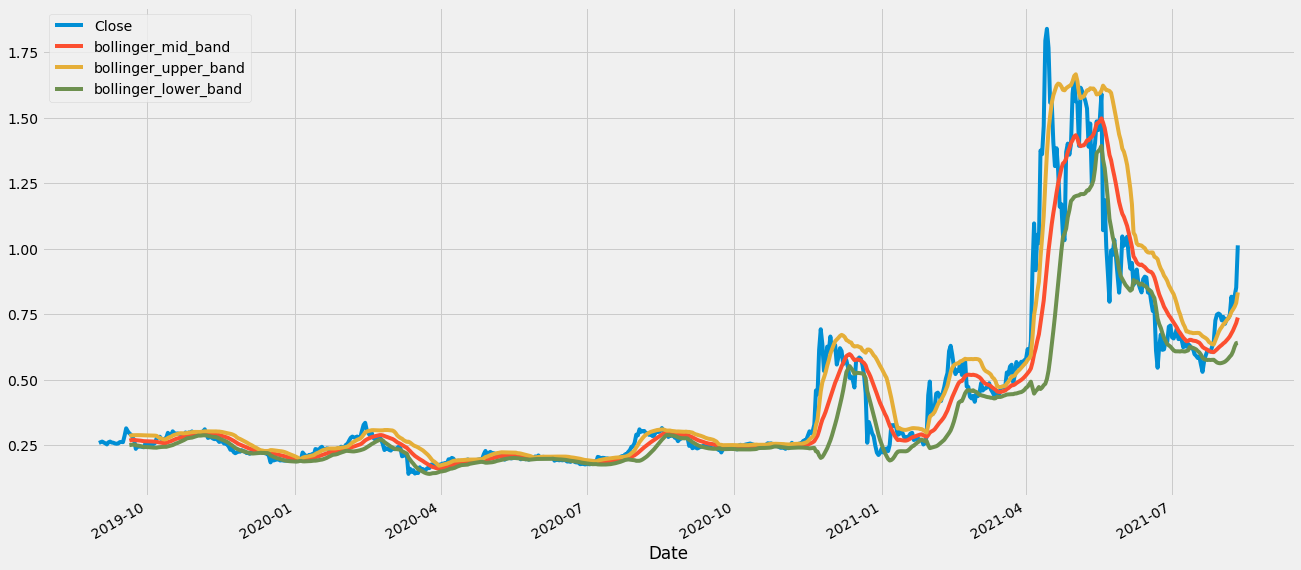

In [ ]:
# Plot the Bollinger Bands for BTC/USD closing prices
xrp[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [ ]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(xrp['Close'], xrp['bollinger_lower_band'], xrp['bollinger_upper_band'])

In [ ]:
import math

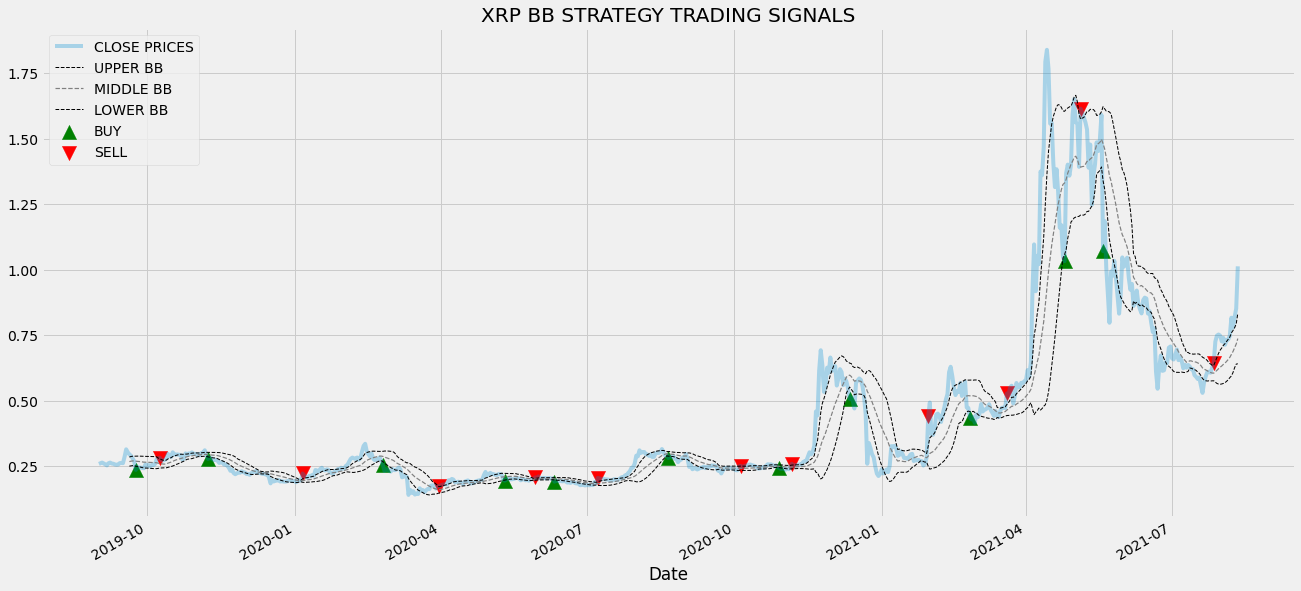

In [ ]:
# PLOT TRADE SIGNALS
xrp['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
xrp['bollinger_upper_band'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
xrp['bollinger_mid_band'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
xrp['bollinger_lower_band'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(xrp.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(xrp.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('XRP BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
position = []
bb_signal = xrp['bollinger_signal']
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(xrp['Close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
upper_bb = xrp['bollinger_upper_band']
lower_bb = xrp['bollinger_lower_band']
close_price = xrp['Close']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(xrp.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(xrp.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
# strategy = strategy.reset_index().drop('Date', axis = 1)

strategy

,Close,bollinger_upper_band,bollinger_lower_band,bollinger_signal,bb_position
Date,,,,,
2019-09-01,0.258054,NaN,NaN,0.0,1
2019-09-02,0.260820,NaN,NaN,0.0,1
2019-09-03,0.263139,NaN,NaN,0.0,1
2019-09-04,0.259905,NaN,NaN,0.0,1
2019-09-05,0.256346,NaN,NaN,0.0,1
...,...,...,...,...,...
2021-08-07,0.816281,0.758298,0.593942,-1.0,0
2021-08-08,0.778739,0.767422,0.606936,-1.0,0
2021-08-09,0.818553,0.777902,0.625378,-1.0,0


In [ ]:
xrp_ret = pd.DataFrame(np.diff(xrp['Close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(xrp_ret)):
    try:
        returns = xrp_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/xrp['Close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB strategy by investing $100k in XRP : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the BB strategy by investing $100k in XRP : 14262.76
Profit percentage of the BB strategy : 14%


In [ ]:
strategy.to_csv('XRP 1D BOLLINGER BANDS TRADE STRATEGY.CSV')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>